<a href="https://colab.research.google.com/github/boryslawskamaria/ML_scripts/blob/main/Titanic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

An an optimal model explaining the variable "survived" was created.  Data was separated into 80% train and 20% test. Best parameters were found for cross-testing. The operation of the model was tested on on the previously separated 20% of the data.

[[0 3 'male' 22.0]
 [1 1 'female' 38.0]
 [1 3 'female' 26.0]
 ...
 [1 1 'female' 19.0]
 [1 1 'male' 26.0]
 [0 3 'male' 32.0]] 142.8 571.2
[[2 0 18.0]
 [1 1 35.0]
 [1 1 40.0]
 ...
 [3 0 34.0]
 [1 1 50.0]
 [3 1 22.0]]


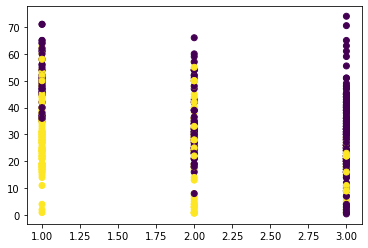

[[288  50]
 [ 61 172]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       338
           1       0.77      0.74      0.76       233

    accuracy                           0.81       571
   macro avg       0.80      0.80      0.80       571
weighted avg       0.80      0.81      0.80       571



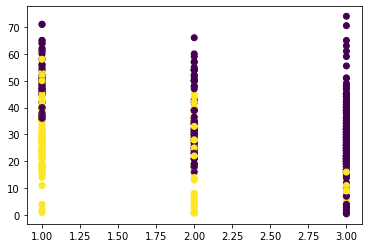

[[305  33]
 [ 77 156]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       338
           1       0.83      0.67      0.74       233

    accuracy                           0.81       571
   macro avg       0.81      0.79      0.79       571
weighted avg       0.81      0.81      0.80       571

[[73 12]
 [17 40]] 
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        85
           1       0.77      0.70      0.73        57

    accuracy                           0.80       142
   macro avg       0.79      0.78      0.78       142
weighted avg       0.79      0.80      0.79       142



In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegressionCV as LRCV
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report

df = pd.read_csv('http://stamfordresearch.com/wp-content/uploads/2016/08/Titanic.csv')
df=df[["Survived", "Pclass", "Sex", "Age"]]
df=df.dropna() 
a=np.asarray(df)
print(a, a.shape[0]*0.2, a.shape[0]*0.8) 
A=np.random.permutation(a) 

y=np.array(A[0:571,0])
y=y.astype('int')
A[A=='male']=0
A[A=='female']=1
x=A[0:571,1:]

print(x)
l=LR()
l.fit(x,y)
y_=l.predict(x)
plt.scatter(x[:,0],x[:,2], c=y_)
plt.show()

print(cm(y, y_))
print(classification_report(y,y_))


l=LRCV()
l.fit(x,y)
y_=l.predict(x)
plt.scatter(x[:,0],x[:,2], c=y_)
plt.show()

print(cm(y, y_))
print(classification_report(y,y_))

xx=A[572:,1:]
yy=np.array(A[572:,0])
yy=yy.astype('int')
yy_=l.predict(xx)

print(cm(yy, yy_), "\n",classification_report(yy,yy_))